# Grama Model Evaluation

*Purpose*: Once we've done the hard work of building a grama model, we can use a variety of tools to use the model. Evaluations are core to using grama.

### TODO 


## Setup


In [1]:
import grama as gr
DF = gr.Intention()
%matplotlib inline

To focus this exercise on using models, let's load up a model to play with:


In [2]:
from grama.models import make_plate_buckle
md_plate = make_plate_buckle()

# Evaluation

Recall that there are four classes of verb in grama; *evaluation* verbs take a model as an input and produce data as an output. Once we've generated that data, we can use visualization and other data tools to learn something about the model.



![Grama verb class diagram](./images/verb-classes.png)


# Manual Input Values

There are two core evaluations---`ev_df()` and `tf_md()`---that require us to specify all the input values. These are manual but fundamental tools for working with a model.

## DataFrame evaluation `ev_df()`

As the prefix implies, `ev_df()` takes a model as an input and returns data as an output. Since we need to specify all model input values, it is most convenient to pair `ev_df()` with the DataFrame constructor `df_make()`. Let's talk about some practical considerations when putting these tools together.


### __qX__ Set the input values


In [3]:
# TASK: Complete the following code
(
    md_plate
# solution-begin
    >> gr.ev_df(
        df=gr.df_make(
            m=1,
            t=0.06,
            h=12,
            w=12,
            L=1e-3,
            E=1e4,
            mu=0.33,
        )
    )
# solution-end
)

,m,t,h,w,L,E,mu,g_buckle,k_cr
0,1,0.06,12,12,0.001,10000.0,0.33,0.921591,4.0


## Evaluation as transformation `tf_md()`

### TODO


In [4]:
from grama.data import df_stang
df_stang.head(6)

,thick,alloy,E,mu,ang
0,0.022,al_24st,10600,0.321,0
1,0.022,al_24st,10600,0.323,0
2,0.032,al_24st,10400,0.329,0
3,0.032,al_24st,10300,0.319,0
4,0.064,al_24st,10500,0.323,0
5,0.064,al_24st,10700,0.328,0


### __qX__ Use a model as a transform


In [5]:
(
    df_stang
    >> gr.tf_mutate(
        m=1,
        L=0.001,
        t=0.06,
        h=12,
        w=12,
    )
# solution-begin
    >> gr.tf_md(md_plate)
# solution-end
)

,thick,alloy,E,mu,ang,m,L,t,h,w,g_buckle,k_cr
0,0.022,al_24st,10600,0.321,0,1,0.001,0.06,12,12,0.970579,4.0
1,0.022,al_24st,10600,0.323,0,1,0.001,0.06,12,12,0.971976,4.0
2,0.032,al_24st,10400,0.329,0,1,0.001,0.06,12,12,0.957800,4.0
3,0.032,al_24st,10300,0.319,0,1,0.001,0.06,12,12,0.941724,4.0
4,0.064,al_24st,10500,0.323,0,1,0.001,0.06,12,12,0.962794,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.064,al_24st,10400,0.327,90,1,0.001,0.06,12,12,0.956391,4.0
72,0.064,al_24st,10500,0.320,90,1,0.001,0.06,12,12,0.960722,4.0
73,0.081,al_24st,9900,0.314,90,1,0.001,0.06,12,12,0.901916,4.0
74,0.081,al_24st,10000,0.316,90,1,0.001,0.06,12,12,0.912317,4.0


# Mixed Manual & Automatic

## Nominal Evaluation


### __qX__ Evaluate at nominal values


In [6]:
(
    md_plate
# solution-begin
    >> gr.ev_nominal(df_det="nom")
# solution-end
)

,E,mu,t,w,L,m,h,g_buckle,k_cr
0,10344.736842,0.321363,0.075,12.0,0.0016,3.0,12.0,4.116312,11.111111


*Observations*

<!-- task-begin -->
- ...
  - (Your response here)
<!-- task-end -->


### __qX__ Sweep key variables


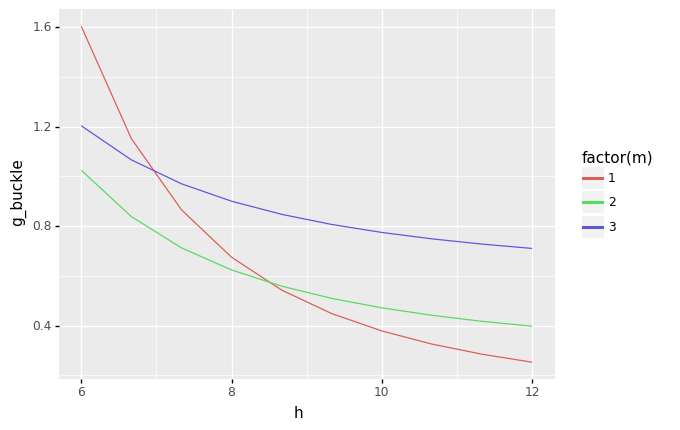

<ggplot: (8774455272717)>

In [7]:
(
    md_plate
    >> gr.ev_nominal(
        df_det=gr.df_grid(
            w=12,
            t=1/32,
            L=0.0016,
# solution-begin
            m=[1, 2, 3],
            h=gr.linspace(6, 12, 10)
# solution-end
        )
    )
    
    >> gr.ggplot(gr.aes("h", "g_buckle"))
    + gr.geom_line(gr.aes(color="factor(m)"))
)

*Observations*

<!-- task-begin -->
- ...
  - (Your response here)
<!-- task-end -->


## Random Sampling


### __qX__ Evaluate a simple random sample




In [9]:
(
    md_plate
# solution-begin
    >> gr.ev_sample(n=1e2, df_det="nom")
# solution-end
)

eval_sample() is rounding n...


,E,mu,t,w,L,m,h,g_buckle,k_cr
0,10487.418224,0.318037,0.075,12.0,0.0016,3.0,12.0,4.163234,11.111111
1,10100.665701,0.310464,0.075,12.0,0.0016,3.0,12.0,3.988507,11.111111
2,10236.675245,0.329909,0.075,12.0,0.0016,3.0,12.0,4.098744,11.111111
3,10371.138732,0.321072,0.075,12.0,0.0016,3.0,12.0,4.125961,11.111111
4,10617.745689,0.327634,0.075,12.0,0.0016,3.0,12.0,4.244263,11.111111
...,...,...,...,...,...,...,...,...,...
95,10223.087306,0.312448,0.075,12.0,0.0016,3.0,12.0,4.042403,11.111111
96,10449.882889,0.325747,0.075,12.0,0.0016,3.0,12.0,4.171371,11.111111
97,10195.561870,0.329865,0.075,12.0,0.0016,3.0,12.0,4.082143,11.111111
98,10302.250987,0.310896,0.075,12.0,0.0016,3.0,12.0,4.069353,11.111111


*Observations*

<!-- task-begin -->
- ...
  - (Your response here)
<!-- task-end -->


### __qX__ Skip evaluation


eval_sample() is rounding n...
Design runtime estimates unavailable; model has no timing data.
Calling plot_scattermat....


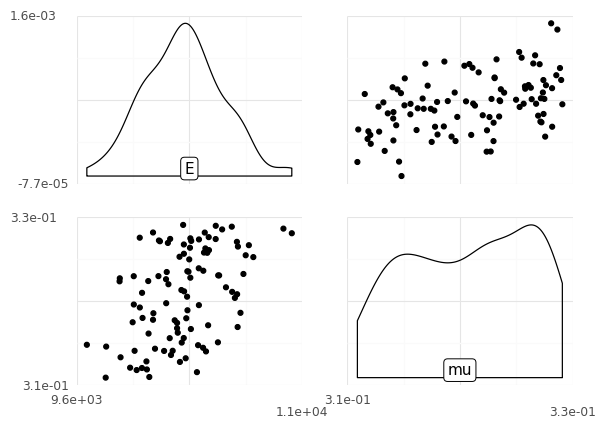

In [33]:
(
    md_plate
    >> gr.ev_sample(
        n=1e2, 
        df_det="nom",
# solution-begin
        skip=True,
# solution-end
    )
    
    # NOTE: No need to edit
    >> gr.pt_auto()
)

*Observations*

<!-- task-begin -->
- ...
  - (Your response here)
<!-- task-end -->


### __qX__ Sweeps with sampling


eval_sample() is rounding n...


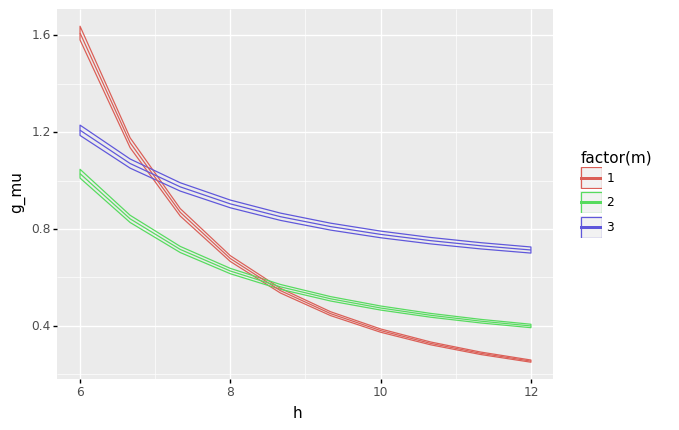

<ggplot: (8774445932261)>

In [12]:
(
    md_plate
# task-begin
    # Uncomment, replace ev_nominal() with ev_sample(),
    # adjust the arguments to ev_sample()
    # >> gr.ev_nominal(
    #     df_det=gr.df_grid(
    #         w=12,
    #         t=1/32,
    #         L=0.0016,
    #         m=[1, 2, 3],
    #         h=gr.linspace(6, 12, 10)
    #     )
    # )
# task-end
# solution-begin
    >> gr.ev_sample(
        n=1e2,
        df_det=gr.df_grid(
            w=12,
            t=1/32,
            L=0.0016,
            m=[1, 2, 3],
            h=gr.linspace(6, 12, 10)
        )
    )
# solution-end
    
    ## NOTE: No need to edit below; use to inspect results
    # Compute low, middle, high values at each m, h
    >> gr.tf_group_by(DF.m, DF.h)
    >> gr.tf_summarize(
        g_lo=gr.quant(DF.g_buckle, p=0.25),
        g_mu=gr.median(DF.g_buckle),
        g_hi=gr.quant(DF.g_buckle, p=0.75),
    )
    # Visualize
    >> gr.ggplot(gr.aes("h", "g_mu", color="factor(m)"))
    + gr.geom_ribbon(gr.aes(ymin="g_lo", ymax="g_hi"), fill=None)
    + gr.geom_line()
)

*Observations*

<!-- task-begin -->
- ...
  - (Your response here)
<!-- task-end -->


# Automatic Input Values

## Contour Evaluation


### __qX__ Visualize function contours


Calling plot_contour....


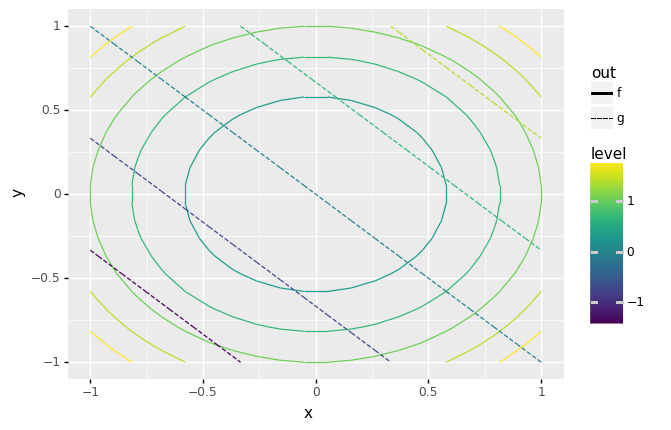

<ggplot: (8774453366718)>

In [14]:
# TASK: Complete the contour evaluation arguments
(
    # NOTE: No need to edit this model
    gr.Model("Contour Demo")
    >> gr.cp_vec_function(
        fun=lambda df: gr.df_make(
            f=df.x**2 + df.y**2,
            g=df.x + df.y,
        ),
        var=["x", "y"],
        out=["f", "g"],
    )
    >> gr.cp_bounds(
        x=(-1, +1),
        y=(-1, +1),
    )
    
    # TASK: Complete the arguments for ev_contour()
    >> gr.ev_contour(
# task-begin
        # HINT: Use Shift+Tab to consult the documentation
# task-end
# solution-begin
        var=["x", "y"],
        out=["f", "g"],
# solution-end
    )
    
    # NOTE: No need to edit; use to visualize
    >> gr.pt_auto()
)

*Observations*

<!-- task-begin -->
- ...
  - (Your response here)
<!-- task-end -->


### __qX__ Find specific contour levels

Use `gr.ev_contour()` to find the contour of `g` that is tangent to the contour where `f == 1`.


Calling plot_contour....


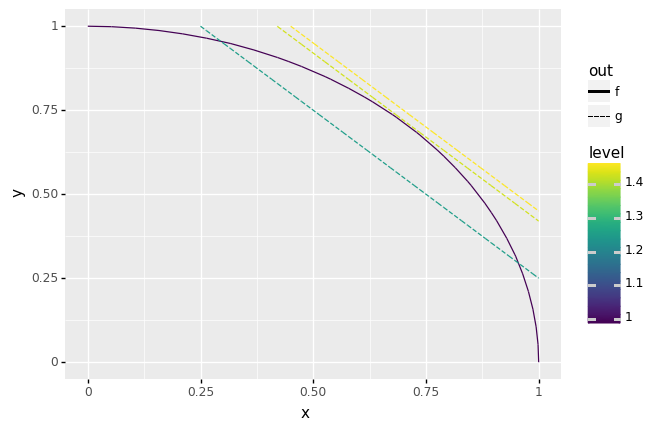

<ggplot: (8774455680061)>

In [24]:
# TASK: Find the tangent contour of `g`
df_contour = (
    # NOTE: No need to edit this model
    gr.Model("Contour Demo")
    >> gr.cp_vec_function(
        fun=lambda df: gr.df_make(
            f=df.x**2 + df.y**2,
            g=df.x + df.y,
        ),
        var=["x", "y"],
        out=["f", "g"],
    )
    >> gr.cp_bounds(
        x=(0, +1),
        y=(0, +1),
    )
    
    # TASK: Use specific levels to find the tangent
    >> gr.ev_contour(
        var=["x", "y"],
        out=["f", "g"],
# task-begin
        # HINT: Use Shift+Tab to consult the documentation
# task-end
# solution-begin
        levels=dict(
            f=[1],
            g=[1.25, 1.42, 1.45], # g == 1.42 is approximately correct
        )
# solution-end
    )
)

# NOTE: No need to edit; use to visualize
gr.plot_auto(df_contour)

## Constrained Minimization


In [28]:
# NOTE: No need to edit
df_opt = (
    # Set up a model
    gr.Model("Contour Demo")
    >> gr.cp_vec_function(
        fun=lambda df: gr.df_make(
            f=df.x**2 + df.y**2,
            g=df.x + df.y - 1.42,
        ),
        var=["x", "y"],
        out=["f", "g"],
    )
    >> gr.cp_bounds(
        x=(0, +1),
        y=(0, +1),
    )
    
    # Minimize the objective with a constraint
    >> gr.ev_min(
        out_min="f",
        out_geq=["g"],
    )
)

df_opt

,x,y,x_0,y_0,g,f,success,message,n_iter
0,0.71,0.71,0.5,0.5,1.776357e-15,1.0082,True,Optimization terminated successfully,3


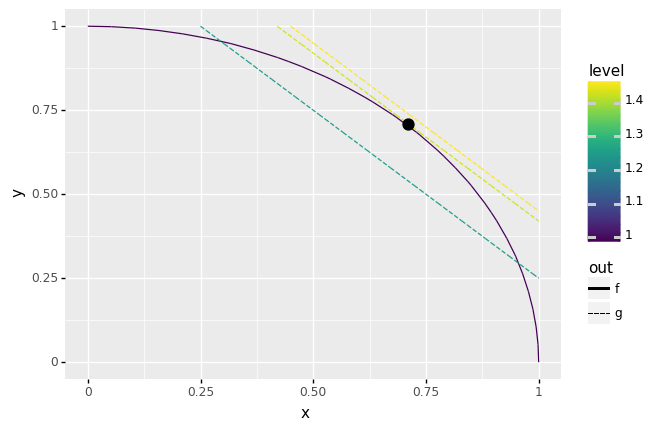

<ggplot: (8774455984119)>

In [32]:
# NOTE: No need to edit; this visualizes the optimization results
# in the context of the contour data
(
    df_contour
    >> gr.ggplot(gr.aes("x", "y"))
    + gr.geom_segment(
        gr.aes(
            xend="x_end", 
            yend="y_end",
            color="level",
            linetype="out",
          )
    )
    + gr.geom_point(data=df_opt, size=4)
)

# List of evaluation routines

| Verb | Input values | Description |
|------|-------|-------------|
| `ev_df()` | Manual | DataFrame evaluation |
| `tf_md()` | Manual | Model as transformation |
| `ev_nominal()` | Mixed | Nominal values for random inputs |
| `ev_sample()` | Mixed | Random values for random inputs |
| `ev_conservative()` | Mixed | Conservative values for random inputs |
| `ev_contour()` | Auto | Generate contour plot data |
| `ev_sinews()` | Auto | Generate sinew plot data |
| `ev_min()` | Auto | Constrained minimization |
